In [1]:
import requests
import pandas as pd

In [2]:
data = pd.read_csv('./data/yes24BookInfo1207.csv')

In [3]:
data['DetailLink']

0         https://www.yes24.com/Product/Goods/115142458
1         https://www.yes24.com/Product/Goods/116579452
2         https://www.yes24.com/Product/Goods/116046489
3          https://www.yes24.com/Product/Goods/99308021
4         https://www.yes24.com/Product/Goods/111088149
                              ...                      
188956      https://www.yes24.com/Product/Goods/2804911
188957      https://www.yes24.com/Product/Goods/3203935
188958      https://www.yes24.com/Product/Goods/3064765
188959      https://www.yes24.com/Product/Goods/3139535
188960      https://www.yes24.com/Product/Goods/2593800
Name: DetailLink, Length: 188961, dtype: object

In [4]:
detail_link = pd.DataFrame(data['DetailLink'])

In [5]:
detail_link = detail_link.drop_duplicates()

In [6]:
detail_link_df = pd.DataFrame(detail_link['DetailLink'])

In [7]:
detail_link_df

,DetailLink
0,https://www.yes24.com/Product/Goods/115142458
1,https://www.yes24.com/Product/Goods/116579452
2,https://www.yes24.com/Product/Goods/116046489
3,https://www.yes24.com/Product/Goods/99308021
4,https://www.yes24.com/Product/Goods/111088149
...,...
188952,https://www.yes24.com/Product/Goods/3209757
188953,https://www.yes24.com/Product/Goods/3195611
188955,https://www.yes24.com/Product/Goods/3142105
188957,https://www.yes24.com/Product/Goods/3203935


In [8]:
detail_link_df = detail_link_df.reset_index(drop = True)

In [15]:
detail_link_df.to_csv('./data/detail_link_df_1207.csv')

In [9]:
import requests
url = 'https://www.yes24.com/Product/Goods/115142458'
r = requests.get(url)
print(r.status_code)


200


In [10]:
from bs4 import BeautifulSoup as bs
soup = bs(r.text, 'lxml')

<!DOCTYPE html>
<html lang="ko">
<head><link href="https://m.yes24.com/Goods/Detail/115142458" rel="canonical"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" http-equiv="Accept-CH"/>
<meta content="86400" http-equiv="Accept-CH-Lifetime"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="width=1170" name="viewport"/>
<title>만일 내가 인생을 다시 산다면 - 예스24 </title>
<meta content="만일 내가 인생을 다시 산다면" name="title"/>
<meta content="김혜남 저" name="author"/>
<meta content="벌써 마흔이 된 당신에게 해 주고 싶은 말들 42. 김혜남 저. 메이븐. 판매가 15,480원(10% 할인). 포인트 860원(5% 적립). “하나의 문이 닫히면 또 하나의 문이 열린다. 그러니 더 이상 고민하지 말고 그냥 재미있게 살아라!”30년 동안 정신분..." name="description"/>
<meta content="인생후반전,마흔즈음에,2023대구올해의책,크레마클럽에있어요,인생선배,인생2막대비,내인생이달라졌다,인생은끝까지모르는거야,인생교훈,벌써 마흔이 된 당신에게 해 주고 싶은 말들 42, 김혜남 저, 메이븐,1190538512,9791190538510" na
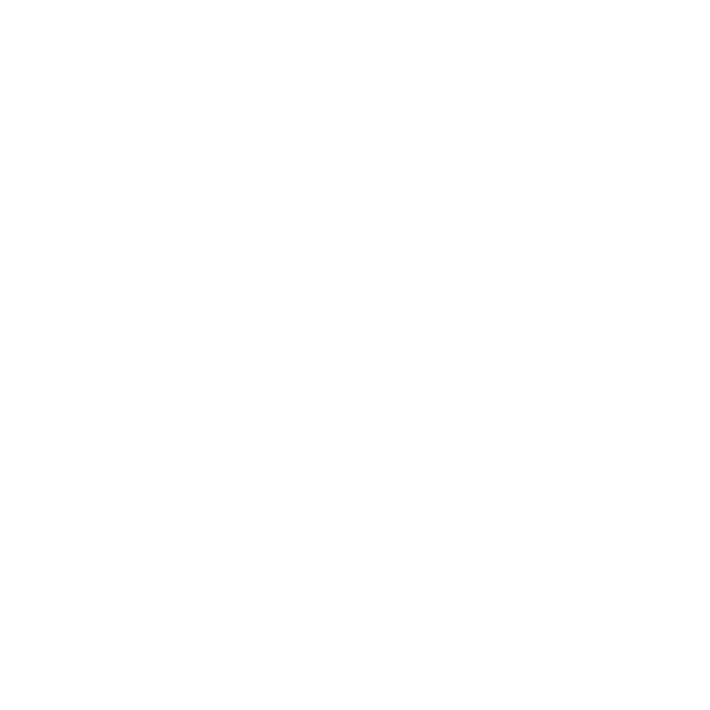
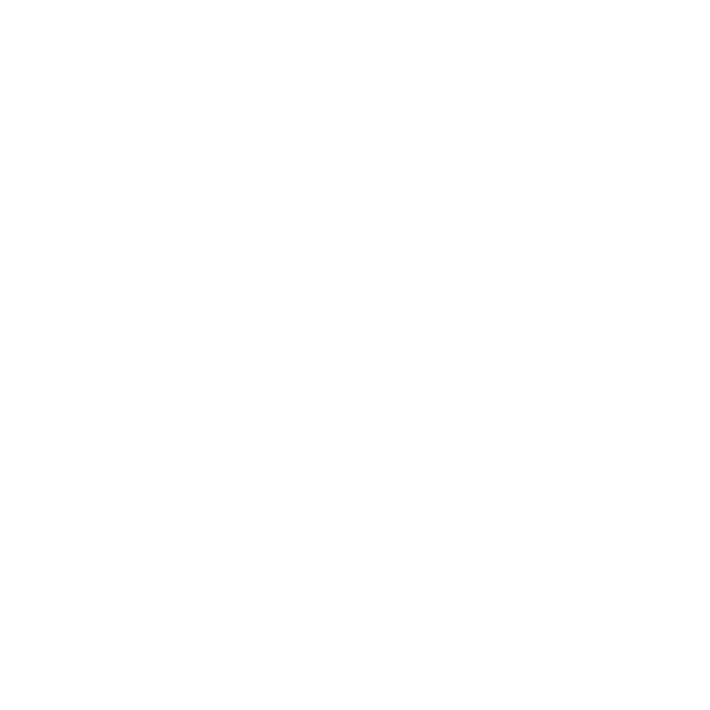
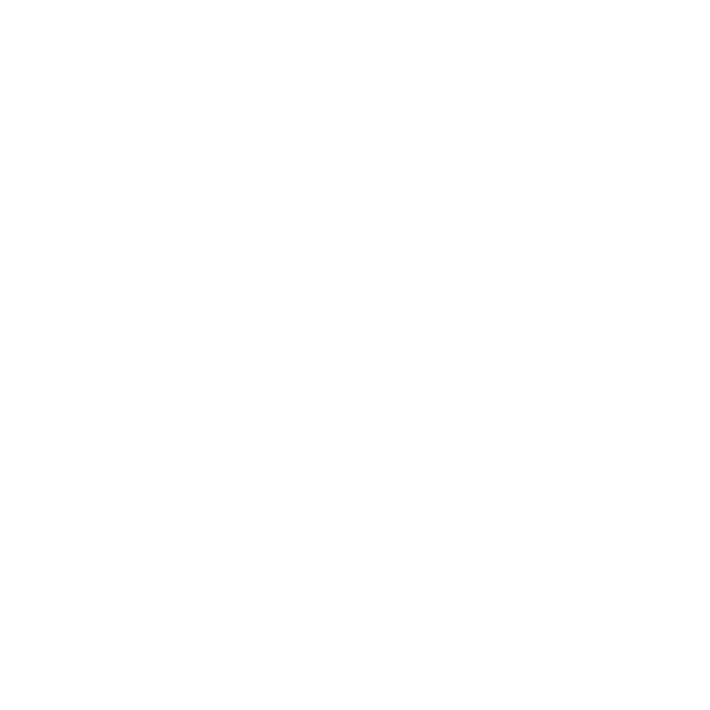
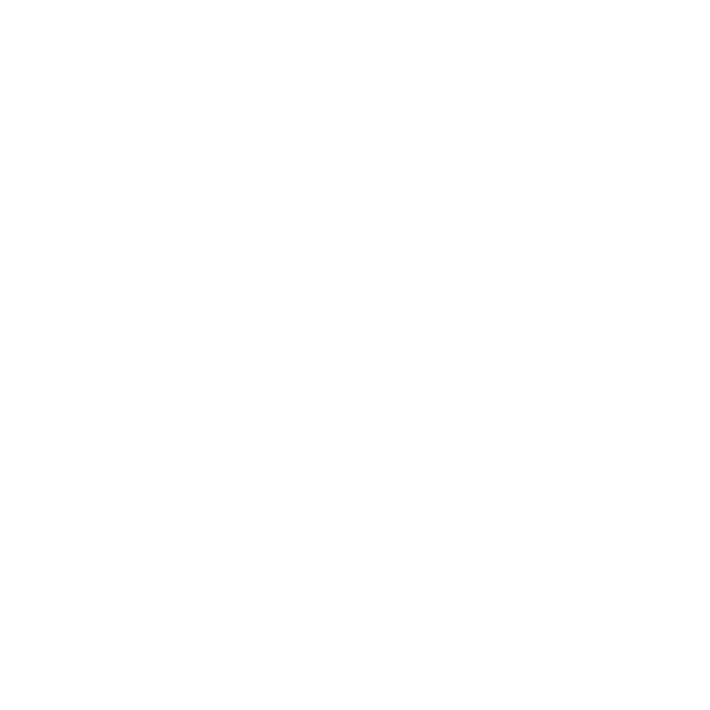
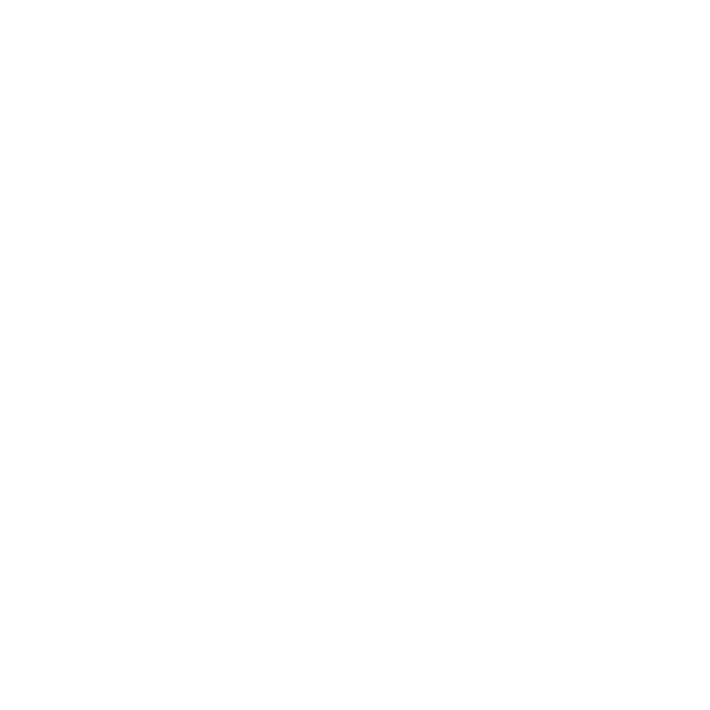
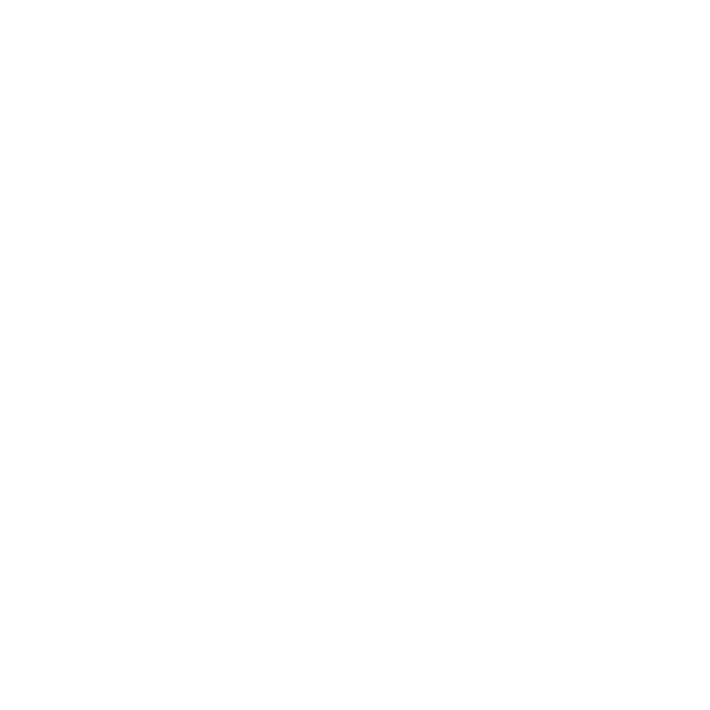
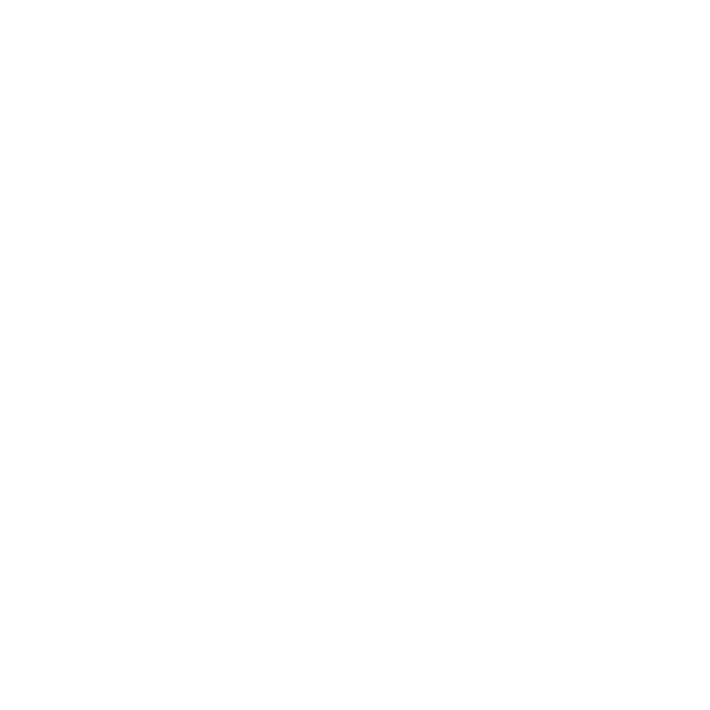
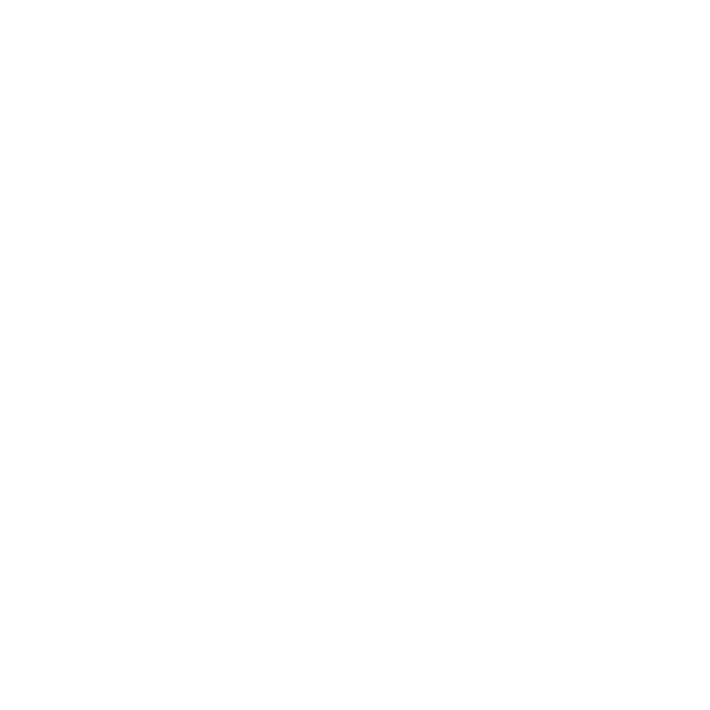
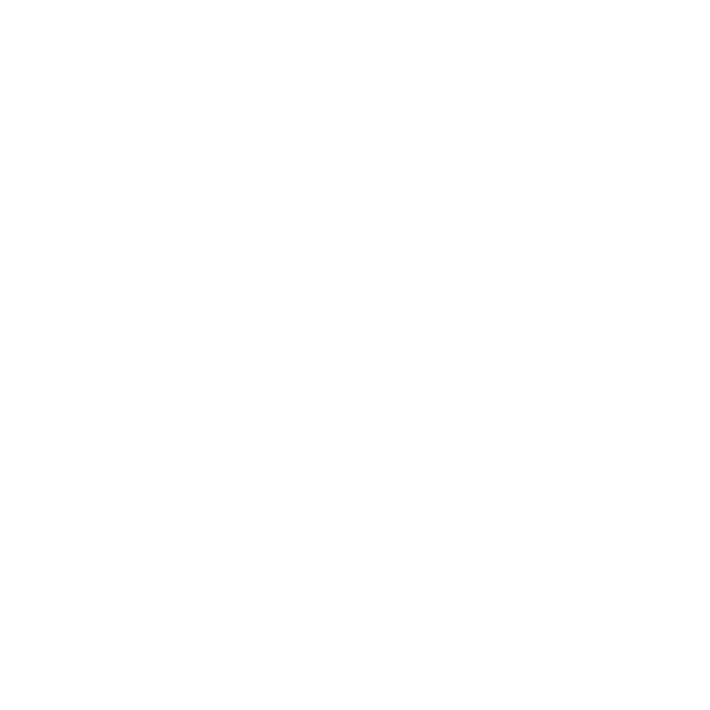
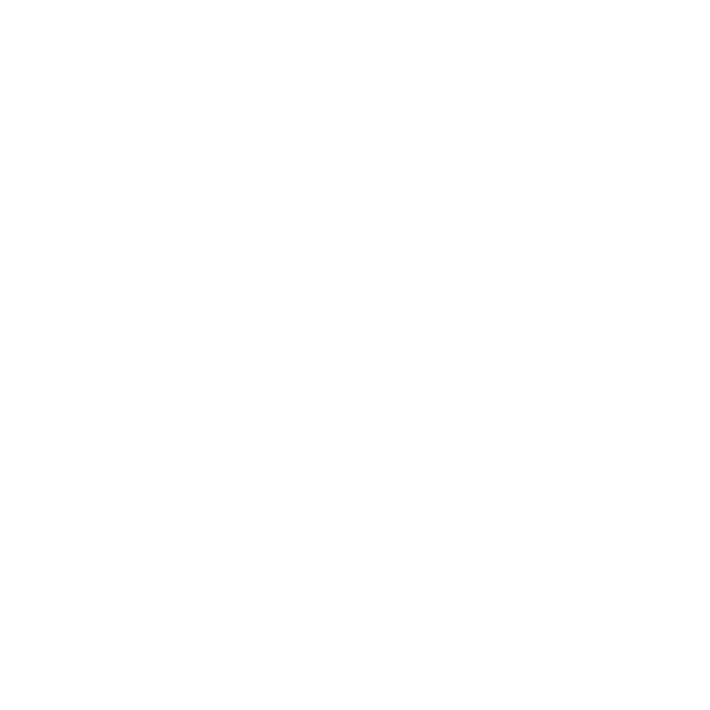
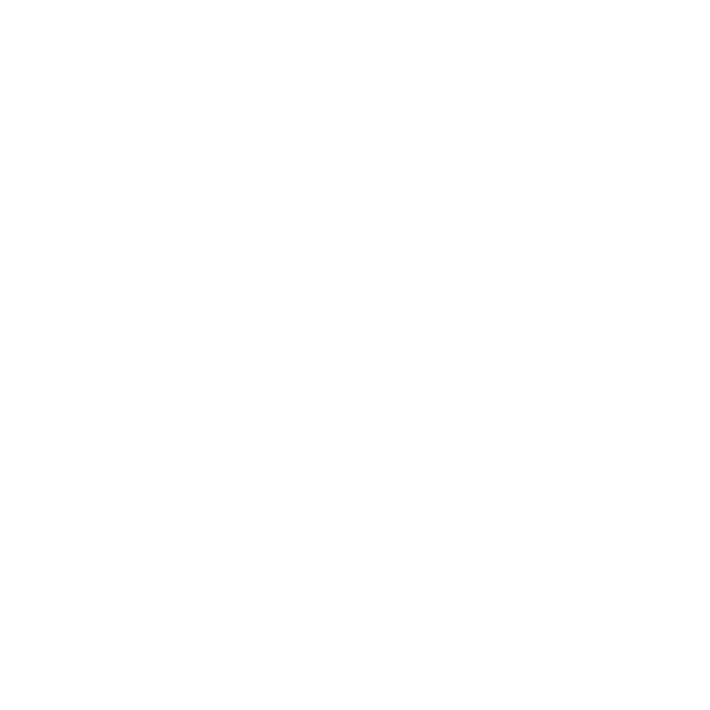
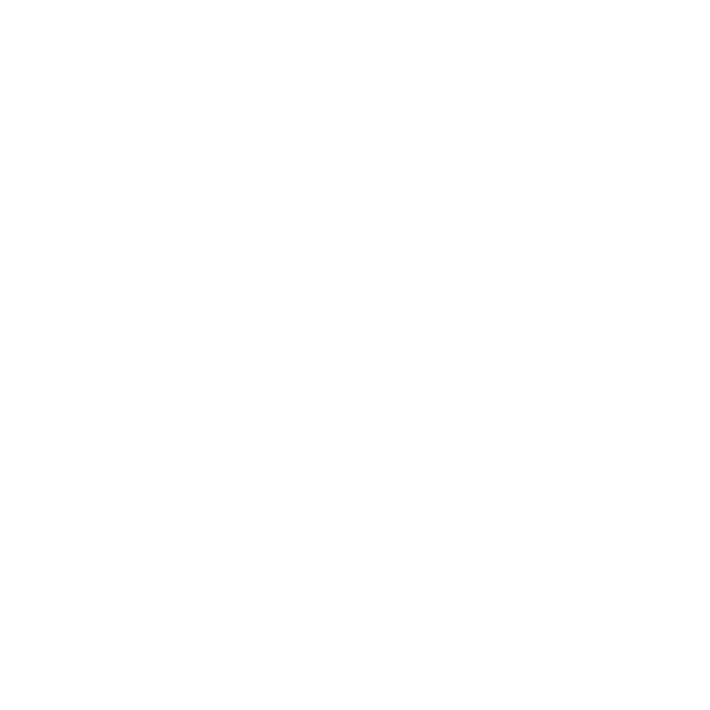
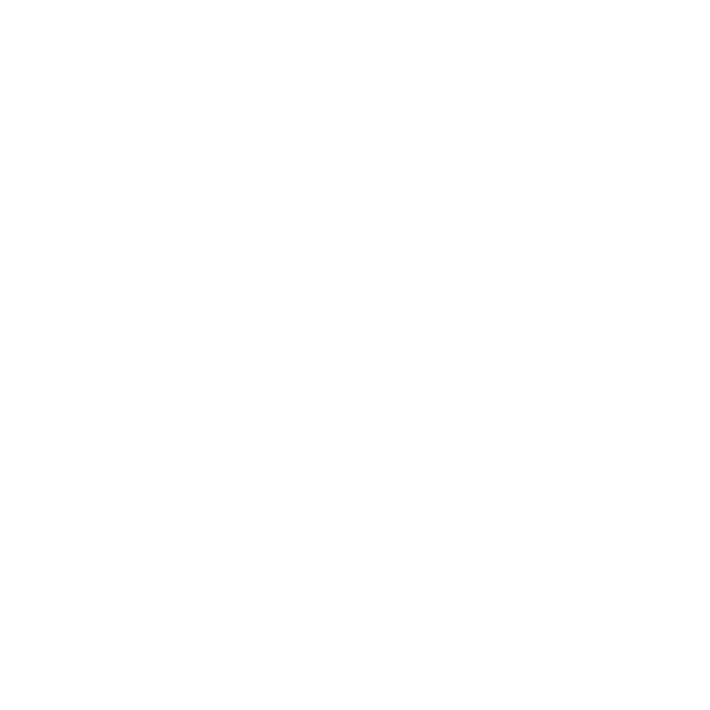
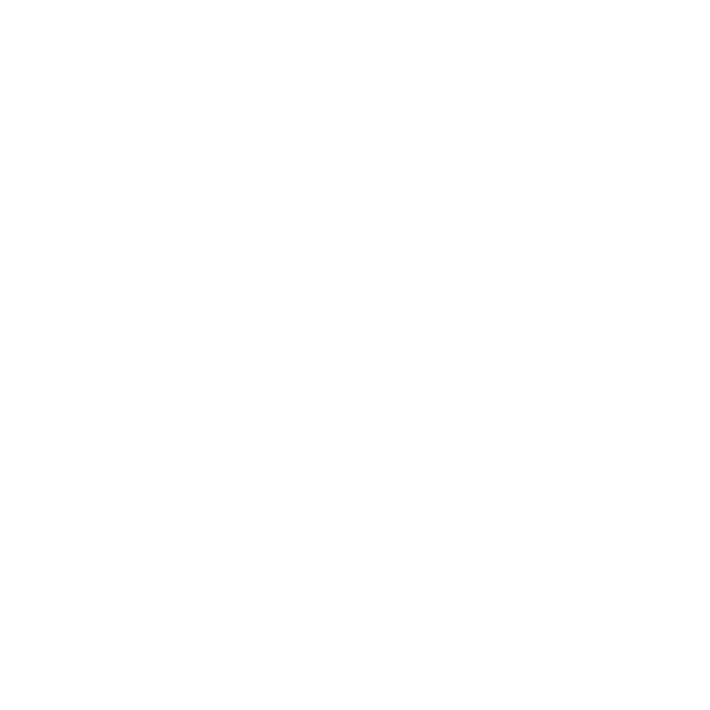
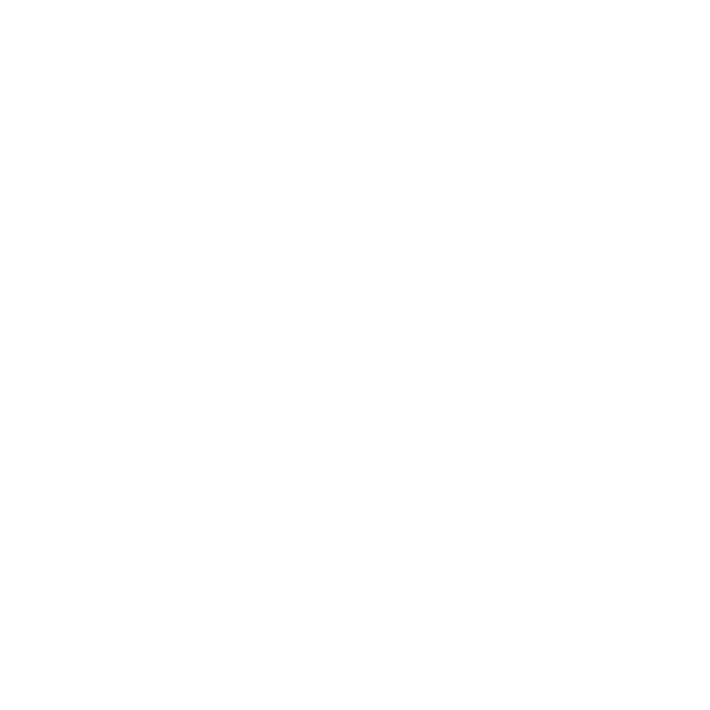
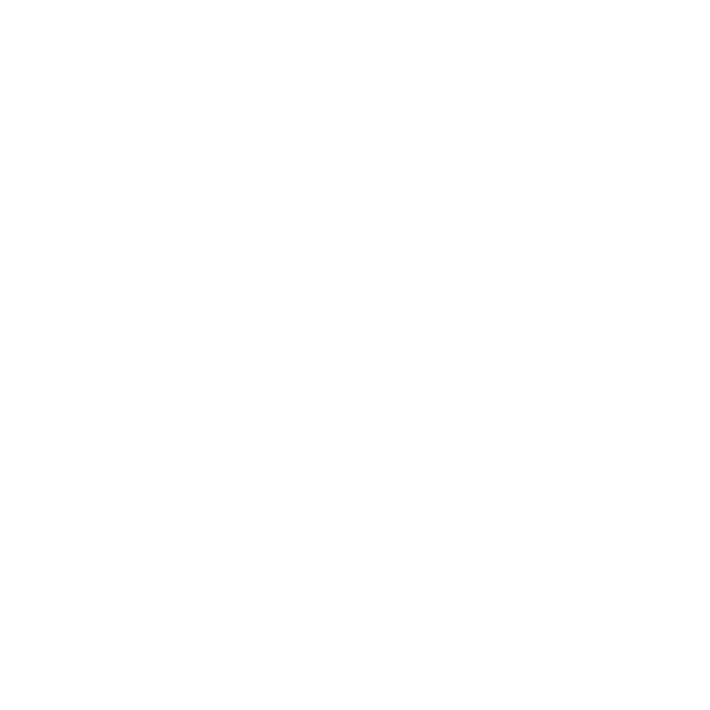
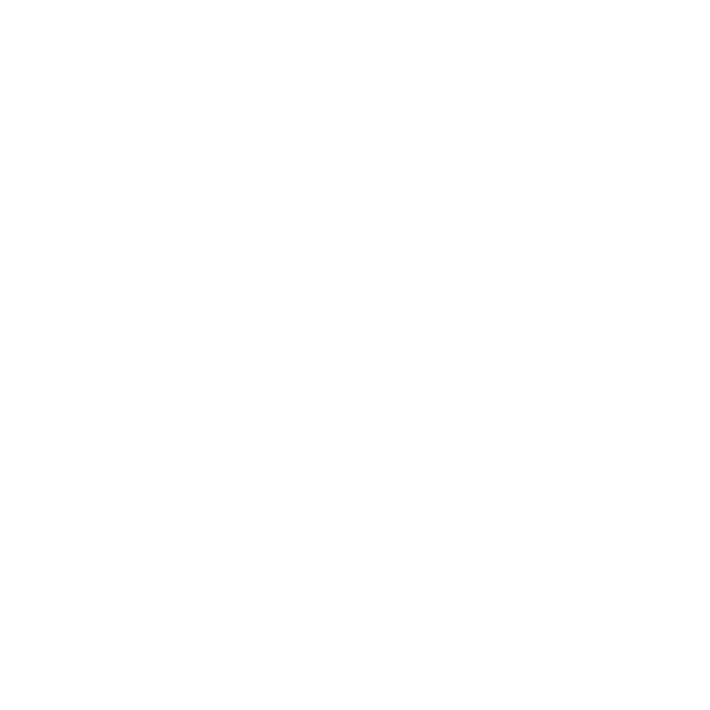
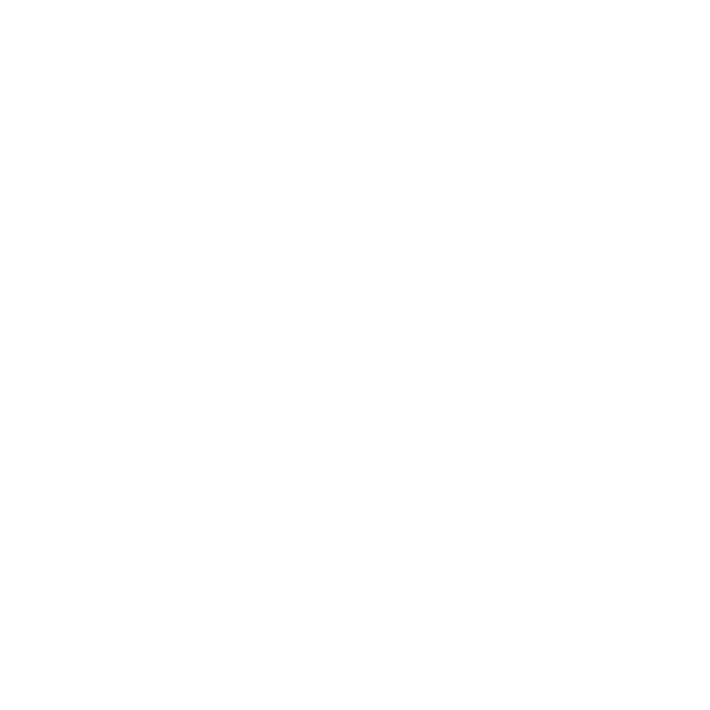
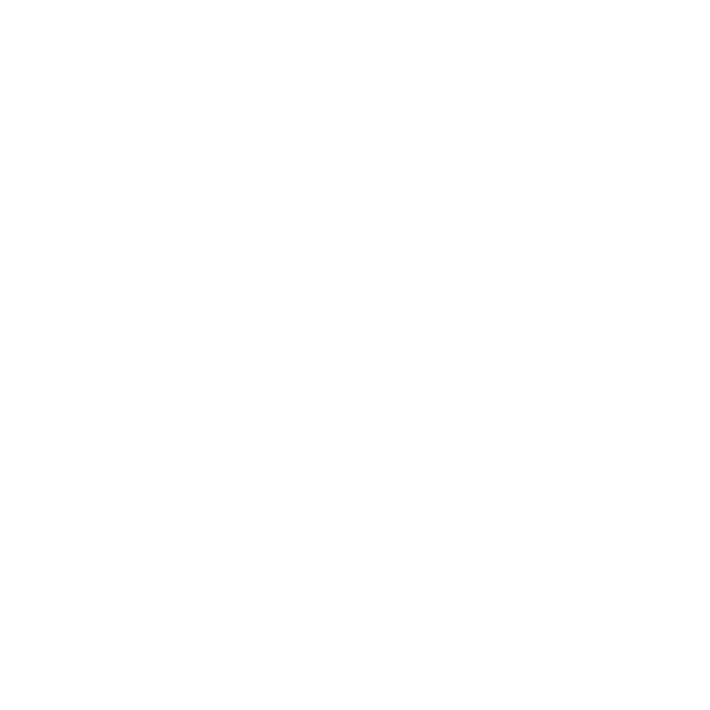
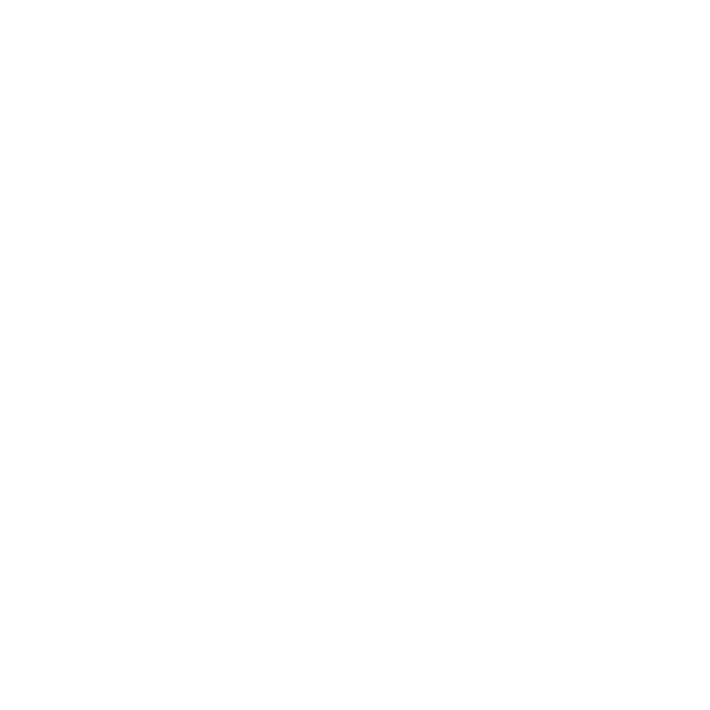

In [11]:
soup

In [17]:
soup.select_one('.gd_name').text

'만일 내가 인생을 다시 산다면'

In [39]:
soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'})

<ul class="yesAlertLi">
<li> <em class="bl_dot bgYUI"> </em>
<a href="https://www.yes24.com/Main/Book.aspx?CategoryNumber=001">국내도서</a>
<em class="divi_cate bgYUI">&gt;</em>
<a href="/24/Category/Display/001001019">인문</a>
<em class="divi_cate bgYUI">&gt;</em>
<a href="/24/Category/Display/001001019019">주제로 읽는 인문학 </a>
<em class="divi_cate bgYUI">&gt;</em>
<a href="/24/Category/Display/001001019019002">노년 / 죽음</a>
</li>
</ul>

In [29]:
soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'}).text.split('\n')

['', ' \xa0', '국내도서', '>', '인문', '>', '주제로 읽는 인문학 ', '>', '노년 / 죽음', '', '']

In [37]:
soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'}).text.replace("\n", ' ').strip().split('>')

['국내도서 ', ' 인문 ', ' 주제로 읽는 인문학  ', ' 노년 / 죽음']

In [38]:
categories = soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'}).text.replace("\n", ' ').strip().split('>')

In [43]:
soup.select_one('.gd_infoTb')

<div class="gd_infoTb">
<table summary="상품 가격정보 테이블">
<colgroup>
<col width="110"/>
<col width="*"/>
</colgroup>
<caption>상품 가격정보</caption>
<tbody>
<!-- 개발 코맨트 : 음반/DVD/GIFT 는 "정가/판매가" 가 아니라 "판매가/할인가" 임 -->
<tr>
<th scope="row">
                        정가
                    </th>
<td>
<span class=""><em class="yes_m">17,200원</em></span>
</td>
</tr>
<tr class="accentRow">
<th scope="row">판매가</th>
<td>
<span class="nor_price"><em class="yes_m">15,480</em>원</span>  (10% 할인)
                                    </td>
</tr>
<!-- 가격표시쿠폰 시작 -->
<!-- 가격표시쿠폰 끝 -->
<tr class="accentRow">
<th scope="row">
                        크레마머니<br/>최대혜택가
                        <a class="bgYUI ico_comm ico_help" href="javascript:void(0)" onclick="openlayerNew('dPop_cremaPrice',this,true, 380);" title="도움말"></a>
</th>
<td>
<span class="nor_price crema_price"><em class="yes_m">13,980</em>원</span>
</td>
</tr>
<tr>
<th scope="row">
                    YES포인트 <a class="bgYUI ico_comm ico_help" href="javascript:

In [45]:
price = soup.select_one('.gd_infoTb').find('em',{"class":'yes_m'}).text

'17,200원'

# 추가 정보

In [12]:
detail_link_df

,DetailLink
0,https://www.yes24.com/Product/Goods/115142458
1,https://www.yes24.com/Product/Goods/116579452
2,https://www.yes24.com/Product/Goods/116046489
3,https://www.yes24.com/Product/Goods/99308021
4,https://www.yes24.com/Product/Goods/111088149
...,...
42948,https://www.yes24.com/Product/Goods/3209757
42949,https://www.yes24.com/Product/Goods/3195611
42950,https://www.yes24.com/Product/Goods/3142105
42951,https://www.yes24.com/Product/Goods/3203935


In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import time

In [ ]:
detail_info = []
for idx, link in enumerate(detail_link_df['DetailLink'][1713:]):
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    driver.set_window_size(1920, 1080)
    try:
        print(f"{idx}번째 link 수집중")
        driver.get(link)
        time.sleep(3)
        soup = bs(driver.page_source, 'lxml')
        title = soup.select_one('.gd_name').text
        categories = soup.select_one('#infoset_goodsCate').find('ul',{"class":'yesAlertLi'}).text.replace("\n", ' ').strip().split('>')
        price = soup.select_one('.gd_infoTb').find('em',{"class":'yes_m'}).text
        detail_info.append({"Title":title, "Category":categories, "Price":price})
        print("append중")
    except Exception as e:
        print("없음",e)
        pass
    finally:
        driver.quit()
        

0번째 link 수집중
append중
1번째 link 수집중
append중
2번째 link 수집중
append중
3번째 link 수집중
append중
4번째 link 수집중
append중
5번째 link 수집중
append중
6번째 link 수집중
append중
7번째 link 수집중
append중
8번째 link 수집중
append중
9번째 link 수집중
append중
10번째 link 수집중
append중
11번째 link 수집중
append중
12번째 link 수집중
append중
13번째 link 수집중
append중
14번째 link 수집중
append중
15번째 link 수집중
append중
16번째 link 수집중
append중
17번째 link 수집중
append중
18번째 link 수집중
append중
19번째 link 수집중
append중
20번째 link 수집중
append중
21번째 link 수집중
append중
22번째 link 수집중
append중
23번째 link 수집중
append중
24번째 link 수집중
append중
25번째 link 수집중
append중
26번째 link 수집중
append중
27번째 link 수집중
append중
28번째 link 수집중
append중
29번째 link 수집중
append중
30번째 link 수집중
append중
31번째 link 수집중
append중
32번째 link 수집중
append중
33번째 link 수집중
append중
34번째 link 수집중
append중
35번째 link 수집중
append중
36번째 link 수집중
append중
37번째 link 수집중
append중
38번째 link 수집중
append중
39번째 link 수집중
append중
40번째 link 수집중
append중
41번째 link 수집중
append중
42번째 link 수집중
append중
43번째 link 수집중
append중
44번째 link 수집중
append중
45번째 link 수집중
append

294번째 link 수집중
append중
295번째 link 수집중
append중
296번째 link 수집중
append중
297번째 link 수집중
append중
298번째 link 수집중
append중
299번째 link 수집중
append중
300번째 link 수집중
append중
301번째 link 수집중
append중
302번째 link 수집중
append중
303번째 link 수집중
append중
304번째 link 수집중
append중
305번째 link 수집중
append중
306번째 link 수집중
append중
307번째 link 수집중
append중
308번째 link 수집중
append중
309번째 link 수집중
append중
310번째 link 수집중
append중
311번째 link 수집중
append중
312번째 link 수집중
append중
313번째 link 수집중
append중
314번째 link 수집중
append중
315번째 link 수집중
append중
316번째 link 수집중
append중
317번째 link 수집중
append중
318번째 link 수집중
append중
319번째 link 수집중
append중
320번째 link 수집중
append중
321번째 link 수집중
append중
322번째 link 수집중
append중
323번째 link 수집중
append중
324번째 link 수집중
append중
325번째 link 수집중
append중
326번째 link 수집중
append중
327번째 link 수집중
append중
328번째 link 수집중
append중
329번째 link 수집중
append중
330번째 link 수집중
append중
331번째 link 수집중
append중
332번째 link 수집중
append중
333번째 link 수집중
append중
334번째 link 수집중
append중
335번째 link 수집중
append중
336번째 link 수집중
append중
337번째 link 

597번째 link 수집중
append중
598번째 link 수집중
append중
599번째 link 수집중
append중
600번째 link 수집중
append중
601번째 link 수집중
append중
602번째 link 수집중
append중
603번째 link 수집중
append중
604번째 link 수집중
append중
605번째 link 수집중
append중
606번째 link 수집중
append중
607번째 link 수집중
append중
608번째 link 수집중
append중
609번째 link 수집중
append중
610번째 link 수집중
append중
611번째 link 수집중
append중
612번째 link 수집중
append중
613번째 link 수집중
append중
614번째 link 수집중
append중
615번째 link 수집중
append중
616번째 link 수집중
append중
617번째 link 수집중
append중
618번째 link 수집중
append중
619번째 link 수집중
append중
620번째 link 수집중
append중
621번째 link 수집중
append중
622번째 link 수집중
append중
623번째 link 수집중
append중
624번째 link 수집중
append중
625번째 link 수집중
append중
626번째 link 수집중
append중
627번째 link 수집중
append중
628번째 link 수집중
append중
629번째 link 수집중
append중
630번째 link 수집중
append중
631번째 link 수집중
append중
632번째 link 수집중
append중
633번째 link 수집중
append중
634번째 link 수집중
append중
635번째 link 수집중
append중
636번째 link 수집중
append중
637번째 link 수집중
append중
638번째 link 수집중
append중
639번째 link 수집중
append중
640번째 link 

append중
920번째 link 수집중
append중
921번째 link 수집중
append중
922번째 link 수집중
append중
923번째 link 수집중
append중
924번째 link 수집중
append중
925번째 link 수집중
append중
926번째 link 수집중
append중
927번째 link 수집중
append중
928번째 link 수집중
append중
929번째 link 수집중
append중
930번째 link 수집중
append중
931번째 link 수집중
append중
932번째 link 수집중
append중
933번째 link 수집중
append중
934번째 link 수집중
append중
935번째 link 수집중
append중
936번째 link 수집중
append중
937번째 link 수집중
append중
938번째 link 수집중
append중
939번째 link 수집중
append중
940번째 link 수집중
append중
941번째 link 수집중
append중
942번째 link 수집중
append중
943번째 link 수집중
append중
944번째 link 수집중
append중
945번째 link 수집중
append중
946번째 link 수집중
append중
947번째 link 수집중
append중
948번째 link 수집중
append중
949번째 link 수집중
append중
950번째 link 수집중
append중
951번째 link 수집중
append중
952번째 link 수집중
append중
953번째 link 수집중
append중
954번째 link 수집중
append중
955번째 link 수집중
append중
956번째 link 수집중
append중
957번째 link 수집중
append중
958번째 link 수집중
append중
959번째 link 수집중
append중
960번째 link 수집중
append중
961번째 link 수집중
append중
962번째 link 수집중
append중
963

append중
1265번째 link 수집중
append중
1266번째 link 수집중
append중
1267번째 link 수집중
append중
1268번째 link 수집중
append중
1269번째 link 수집중
append중
1270번째 link 수집중
append중
1271번째 link 수집중
append중
1272번째 link 수집중
append중
1273번째 link 수집중
append중
1274번째 link 수집중
append중
1275번째 link 수집중
append중
1276번째 link 수집중
append중
1277번째 link 수집중
append중
1278번째 link 수집중
append중
1279번째 link 수집중
append중
1280번째 link 수집중
append중
1281번째 link 수집중
append중
1282번째 link 수집중
append중
1283번째 link 수집중
append중
1284번째 link 수집중
append중
1285번째 link 수집중
append중
1286번째 link 수집중
append중
1287번째 link 수집중
append중
1288번째 link 수집중
append중
1289번째 link 수집중
append중
1290번째 link 수집중
append중
1291번째 link 수집중
append중
1292번째 link 수집중
append중
1293번째 link 수집중
append중
1294번째 link 수집중
append중
1295번째 link 수집중
append중
1296번째 link 수집중
append중
1297번째 link 수집중
append중
1298번째 link 수집중
append중
1299번째 link 수집중
append중
1300번째 link 수집중
append중
1301번째 link 수집중
append중
1302번째 link 수집중
append중
1303번째 link 수집중
append중
1304번째 link 수집중
append중
1305번째 link 수집중
append중
1306번째 l

1574번째 link 수집중
append중
1575번째 link 수집중
append중
1576번째 link 수집중
append중
1577번째 link 수집중
append중
1578번째 link 수집중
append중
1579번째 link 수집중
append중
1580번째 link 수집중
append중
1581번째 link 수집중
append중
1582번째 link 수집중
append중
1583번째 link 수집중
없음 Alert Text: [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.
Message: unexpected alert open: {Alert text : [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.}
  (Session info: chrome=119.0.6045.200)
Stacktrace:
	GetHandleVerifier [0x00AB72A3+45731]
	(No symbol) [0x00A42D51]
	(No symbol) [0x0093880D]
	(No symbol) [0x0099BC80]
	(No symbol) [0x00987DD6]
	(No symbol) [0x009631F6]
	(No symbol) [0x0096439D]
	GetHandleVerifier [0x00DC0716+3229462]
	GetHandleVerifier [0x00E084C8+3523784]
	GetHandleVerifier [0x00E0214C+3498316]
	GetHandleVerifier [0x00B41680+611968]
	(No symbol) [0x00A4CCCC]
	(No symbol) [0x00A48DF8]
	(No symbol) [0x00A48F1D]
	(No symbol) [0x00A3B2C7]
	BaseThreadInitThunk [0x75ACFCC9+25]
	RtlGetAppContainerNamedObjectPath [0x775A7C6E+286]
	RtlGetAppContainerNamedObjectPath [0x77

1819번째 link 수집중
append중
1820번째 link 수집중
append중
1821번째 link 수집중
append중
1822번째 link 수집중
append중
1823번째 link 수집중
append중
1824번째 link 수집중
append중
1825번째 link 수집중
append중
1826번째 link 수집중
append중
1827번째 link 수집중
append중
1828번째 link 수집중
append중
1829번째 link 수집중
append중
1830번째 link 수집중
append중
1831번째 link 수집중
append중
1832번째 link 수집중
append중
1833번째 link 수집중
append중
1834번째 link 수집중
append중
1835번째 link 수집중
append중
1836번째 link 수집중
append중
1837번째 link 수집중
append중
1838번째 link 수집중
append중
1839번째 link 수집중
append중
1840번째 link 수집중
append중
1841번째 link 수집중
append중
1842번째 link 수집중
append중
1843번째 link 수집중
append중
1844번째 link 수집중
append중
1845번째 link 수집중
append중
1846번째 link 수집중
append중
1847번째 link 수집중
append중
1848번째 link 수집중
append중
1849번째 link 수집중
append중
1850번째 link 수집중
append중
1851번째 link 수집중
append중
1852번째 link 수집중
append중
1853번째 link 수집중
append중
1854번째 link 수집중
append중
1855번째 link 수집중
append중
1856번째 link 수집중
append중
1857번째 link 수집중
append중
1858번째 link 수집중
append중
1859번째 link 수집중
append중
1860번째 link 수집중


append중
2129번째 link 수집중
append중
2130번째 link 수집중
append중
2131번째 link 수집중
append중
2132번째 link 수집중
append중
2133번째 link 수집중
append중
2134번째 link 수집중
append중
2135번째 link 수집중
append중
2136번째 link 수집중
append중
2137번째 link 수집중
append중
2138번째 link 수집중
append중
2139번째 link 수집중
append중
2140번째 link 수집중
append중
2141번째 link 수집중
append중
2142번째 link 수집중
append중
2143번째 link 수집중
append중
2144번째 link 수집중
append중
2145번째 link 수집중
append중
2146번째 link 수집중
append중
2147번째 link 수집중
append중
2148번째 link 수집중
append중
2149번째 link 수집중
append중
2150번째 link 수집중
append중
2151번째 link 수집중
append중
2152번째 link 수집중
append중
2153번째 link 수집중
append중
2154번째 link 수집중
append중
2155번째 link 수집중
append중
2156번째 link 수집중
append중
2157번째 link 수집중
append중
2158번째 link 수집중
append중
2159번째 link 수집중
append중
2160번째 link 수집중
append중
2161번째 link 수집중
append중
2162번째 link 수집중
append중
2163번째 link 수집중
append중
2164번째 link 수집중
append중
2165번째 link 수집중
append중
2166번째 link 수집중
append중
2167번째 link 수집중
append중
2168번째 link 수집중
append중
2169번째 link 수집중
append중
2170번째 l

append중
2469번째 link 수집중
append중
2470번째 link 수집중
append중
2471번째 link 수집중
append중
2472번째 link 수집중
append중
2473번째 link 수집중
append중
2474번째 link 수집중
append중
2475번째 link 수집중
append중
2476번째 link 수집중
append중
2477번째 link 수집중
append중
2478번째 link 수집중
append중
2479번째 link 수집중
append중
2480번째 link 수집중
append중
2481번째 link 수집중
append중
2482번째 link 수집중
append중
2483번째 link 수집중
append중
2484번째 link 수집중
append중
2485번째 link 수집중
append중
2486번째 link 수집중
append중
2487번째 link 수집중
append중
2488번째 link 수집중
append중
2489번째 link 수집중
append중
2490번째 link 수집중
append중
2491번째 link 수집중
append중
2492번째 link 수집중
append중
2493번째 link 수집중
append중
2494번째 link 수집중
append중
2495번째 link 수집중
append중
2496번째 link 수집중
append중
2497번째 link 수집중
append중
2498번째 link 수집중
append중
2499번째 link 수집중
append중
2500번째 link 수집중
append중
2501번째 link 수집중
append중
2502번째 link 수집중
append중
2503번째 link 수집중
append중
2504번째 link 수집중
append중
2505번째 link 수집중
append중
2506번째 link 수집중
append중
2507번째 link 수집중
append중
2508번째 link 수집중
append중
2509번째 link 수집중
append중
2510번째 l

2778번째 link 수집중
append중
2779번째 link 수집중
append중
2780번째 link 수집중
append중
2781번째 link 수집중
append중
2782번째 link 수집중
append중
2783번째 link 수집중
append중
2784번째 link 수집중
append중
2785번째 link 수집중
append중
2786번째 link 수집중
append중
2787번째 link 수집중
append중
2788번째 link 수집중
append중
2789번째 link 수집중
append중
2790번째 link 수집중
append중
2791번째 link 수집중
append중
2792번째 link 수집중
append중
2793번째 link 수집중
append중
2794번째 link 수집중
append중
2795번째 link 수집중
append중
2796번째 link 수집중
append중
2797번째 link 수집중
append중
2798번째 link 수집중
append중
2799번째 link 수집중
append중
2800번째 link 수집중
append중
2801번째 link 수집중
append중
2802번째 link 수집중
append중
2803번째 link 수집중
append중
2804번째 link 수집중
append중
2805번째 link 수집중
append중
2806번째 link 수집중
append중
2807번째 link 수집중
append중
2808번째 link 수집중
append중
2809번째 link 수집중
append중
2810번째 link 수집중
append중
2811번째 link 수집중
append중
2812번째 link 수집중
append중
2813번째 link 수집중
append중
2814번째 link 수집중
append중
2815번째 link 수집중
append중
2816번째 link 수집중
append중
2817번째 link 수집중
append중
2818번째 link 수집중
append중
2819번째 link 수집중


append중
2991번째 link 수집중
append중
2992번째 link 수집중
append중
2993번째 link 수집중
append중
2994번째 link 수집중
append중
2995번째 link 수집중
append중
2996번째 link 수집중
append중
2997번째 link 수집중
append중
2998번째 link 수집중
append중
2999번째 link 수집중
append중
3000번째 link 수집중
append중
3001번째 link 수집중
append중
3002번째 link 수집중
append중
3003번째 link 수집중
append중
3004번째 link 수집중
append중
3005번째 link 수집중
append중
3006번째 link 수집중
append중
3007번째 link 수집중
append중
3008번째 link 수집중
append중
3009번째 link 수집중
append중
3010번째 link 수집중
append중
3011번째 link 수집중
append중
3012번째 link 수집중
append중
3013번째 link 수집중
append중
3014번째 link 수집중
append중
3015번째 link 수집중
append중
3016번째 link 수집중
append중
3017번째 link 수집중
append중
3018번째 link 수집중
append중
3019번째 link 수집중
append중
3020번째 link 수집중
append중
3021번째 link 수집중
append중
3022번째 link 수집중
append중
3023번째 link 수집중
append중
3024번째 link 수집중
append중
3025번째 link 수집중
append중
3026번째 link 수집중
append중
3027번째 link 수집중
append중
3028번째 link 수집중
append중
3029번째 link 수집중
append중
3030번째 link 수집중
append중
3031번째 link 수집중
append중
3032번째 l

append중
3267번째 link 수집중
append중
3268번째 link 수집중
append중
3269번째 link 수집중
append중
3270번째 link 수집중
append중
3271번째 link 수집중
append중
3272번째 link 수집중
append중
3273번째 link 수집중
append중
3274번째 link 수집중
append중
3275번째 link 수집중
append중
3276번째 link 수집중
append중
3277번째 link 수집중
append중
3278번째 link 수집중
append중
3279번째 link 수집중
append중
3280번째 link 수집중
append중
3281번째 link 수집중
append중
3282번째 link 수집중
append중
3283번째 link 수집중
append중
3284번째 link 수집중
append중
3285번째 link 수집중
append중
3286번째 link 수집중
append중
3287번째 link 수집중
append중
3288번째 link 수집중
append중
3289번째 link 수집중
append중
3290번째 link 수집중
append중
3291번째 link 수집중
append중
3292번째 link 수집중
없음 Alert Text: [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.
Message: unexpected alert open: {Alert text : [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.}
  (Session info: chrome=119.0.6045.200)
Stacktrace:
	GetHandleVerifier [0x012272A3+45731]
	(No symbol) [0x011B2D51]
	(No symbol) [0x010A880D]
	(No symbol) [0x0110BC80]
	(No symbol) [0x010F7DD6]
	(No symbol) [0x010D31F6]
	(No symbol) [0x010D439D]


append중
3478번째 link 수집중
append중
3479번째 link 수집중
append중
3480번째 link 수집중
append중
3481번째 link 수집중
append중
3482번째 link 수집중
append중
3483번째 link 수집중
append중
3484번째 link 수집중
append중
3485번째 link 수집중
append중
3486번째 link 수집중
append중
3487번째 link 수집중
append중
3488번째 link 수집중
append중
3489번째 link 수집중
append중
3490번째 link 수집중
append중
3491번째 link 수집중
append중
3492번째 link 수집중
append중
3493번째 link 수집중
append중
3494번째 link 수집중
append중
3495번째 link 수집중
없음 Alert Text: [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.
Message: unexpected alert open: {Alert text : [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.}
  (Session info: chrome=119.0.6045.200)
Stacktrace:
	GetHandleVerifier [0x010072A3+45731]
	(No symbol) [0x00F92D51]
	(No symbol) [0x00E8880D]
	(No symbol) [0x00EEBC80]
	(No symbol) [0x00ED7DD6]
	(No symbol) [0x00EB31F6]
	(No symbol) [0x00EB439D]
	GetHandleVerifier [0x01310716+3229462]
	GetHandleVerifier [0x013584C8+3523784]
	GetHandleVerifier [0x0135214C+3498316]
	GetHandleVerifier [0x01091680+611968]
	(No symbol) [0x00F9CCCC]
	(No sy

append중
3691번째 link 수집중
append중
3692번째 link 수집중
append중
3693번째 link 수집중
append중
3694번째 link 수집중
append중
3695번째 link 수집중
append중
3696번째 link 수집중
append중
3697번째 link 수집중
append중
3698번째 link 수집중
append중
3699번째 link 수집중
append중
3700번째 link 수집중
append중
3701번째 link 수집중
append중
3702번째 link 수집중
append중
3703번째 link 수집중
append중
3704번째 link 수집중
append중
3705번째 link 수집중
append중
3706번째 link 수집중
append중
3707번째 link 수집중
append중
3708번째 link 수집중
append중
3709번째 link 수집중
append중
3710번째 link 수집중
append중
3711번째 link 수집중
append중
3712번째 link 수집중
append중
3713번째 link 수집중
append중
3714번째 link 수집중
append중
3715번째 link 수집중
append중
3716번째 link 수집중
append중
3717번째 link 수집중
append중
3718번째 link 수집중
append중
3719번째 link 수집중
append중
3720번째 link 수집중
append중
3721번째 link 수집중
append중
3722번째 link 수집중
append중
3723번째 link 수집중
append중
3724번째 link 수집중
append중
3725번째 link 수집중
append중
3726번째 link 수집중
append중
3727번째 link 수집중
append중
3728번째 link 수집중
append중
3729번째 link 수집중
append중
3730번째 link 수집중
append중
3731번째 link 수집중
append중
3732번째 l

append중
3936번째 link 수집중
append중
3937번째 link 수집중
append중
3938번째 link 수집중
append중
3939번째 link 수집중
없음 Alert Text: [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.
Message: unexpected alert open: {Alert text : [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.}
  (Session info: chrome=119.0.6045.200)
Stacktrace:
	GetHandleVerifier [0x005D72A3+45731]
	(No symbol) [0x00562D51]
	(No symbol) [0x0045880D]
	(No symbol) [0x004BBC80]
	(No symbol) [0x004A7DD6]
	(No symbol) [0x004831F6]
	(No symbol) [0x0048439D]
	GetHandleVerifier [0x008E0716+3229462]
	GetHandleVerifier [0x009284C8+3523784]
	GetHandleVerifier [0x0092214C+3498316]
	GetHandleVerifier [0x00661680+611968]
	(No symbol) [0x0056CCCC]
	(No symbol) [0x00568DF8]
	(No symbol) [0x00568F1D]
	(No symbol) [0x0055B2C7]
	BaseThreadInitThunk [0x75ACFCC9+25]
	RtlGetAppContainerNamedObjectPath [0x775A7C6E+286]
	RtlGetAppContainerNamedObjectPath [0x775A7C3E+238]

3940번째 link 수집중
append중
3941번째 link 수집중
append중
3942번째 link 수집중
append중
3943번째 link 수집중
append중
3944번째 link 수집중
append중
394

append중
4181번째 link 수집중
append중
4182번째 link 수집중
append중
4183번째 link 수집중
append중
4184번째 link 수집중
append중
4185번째 link 수집중
append중
4186번째 link 수집중
append중
4187번째 link 수집중
append중
4188번째 link 수집중
append중
4189번째 link 수집중
append중
4190번째 link 수집중
append중
4191번째 link 수집중
append중
4192번째 link 수집중
append중
4193번째 link 수집중
append중
4194번째 link 수집중
append중
4195번째 link 수집중
append중
4196번째 link 수집중
append중
4197번째 link 수집중
append중
4198번째 link 수집중
append중
4199번째 link 수집중
append중
4200번째 link 수집중
append중
4201번째 link 수집중
append중
4202번째 link 수집중
append중
4203번째 link 수집중
append중
4204번째 link 수집중
append중
4205번째 link 수집중
append중
4206번째 link 수집중
append중
4207번째 link 수집중
append중
4208번째 link 수집중
append중
4209번째 link 수집중
append중
4210번째 link 수집중
append중
4211번째 link 수집중
append중
4212번째 link 수집중
append중
4213번째 link 수집중
append중
4214번째 link 수집중
append중
4215번째 link 수집중
append중
4216번째 link 수집중
append중
4217번째 link 수집중
append중
4218번째 link 수집중
append중
4219번째 link 수집중
append중
4220번째 link 수집중
append중
4221번째 link 수집중
append중
4222번째 l

4490번째 link 수집중
append중
4491번째 link 수집중
append중
4492번째 link 수집중
append중
4493번째 link 수집중
append중
4494번째 link 수집중
append중
4495번째 link 수집중
append중
4496번째 link 수집중
append중
4497번째 link 수집중
append중
4498번째 link 수집중
append중
4499번째 link 수집중
append중
4500번째 link 수집중
append중
4501번째 link 수집중
append중
4502번째 link 수집중
append중
4503번째 link 수집중
append중
4504번째 link 수집중
append중
4505번째 link 수집중
append중
4506번째 link 수집중
append중
4507번째 link 수집중
append중
4508번째 link 수집중
append중
4509번째 link 수집중
append중
4510번째 link 수집중
append중
4511번째 link 수집중
append중
4512번째 link 수집중
append중
4513번째 link 수집중
append중
4514번째 link 수집중
append중
4515번째 link 수집중
append중
4516번째 link 수집중
append중
4517번째 link 수집중
append중
4518번째 link 수집중
append중
4519번째 link 수집중
append중
4520번째 link 수집중
append중
4521번째 link 수집중
append중
4522번째 link 수집중
append중
4523번째 link 수집중
append중
4524번째 link 수집중
append중
4525번째 link 수집중
append중
4526번째 link 수집중
append중
4527번째 link 수집중
append중
4528번째 link 수집중
append중
4529번째 link 수집중
append중
4530번째 link 수집중
append중
4531번째 link 수집중


append중
4800번째 link 수집중
append중
4801번째 link 수집중
append중
4802번째 link 수집중
append중
4803번째 link 수집중
append중
4804번째 link 수집중
append중
4805번째 link 수집중
append중
4806번째 link 수집중
append중
4807번째 link 수집중
append중
4808번째 link 수집중
append중
4809번째 link 수집중
append중
4810번째 link 수집중
append중
4811번째 link 수집중
append중
4812번째 link 수집중
append중
4813번째 link 수집중
append중
4814번째 link 수집중
append중
4815번째 link 수집중
append중
4816번째 link 수집중
append중
4817번째 link 수집중
append중
4818번째 link 수집중
append중
4819번째 link 수집중
append중
4820번째 link 수집중
append중
4821번째 link 수집중
append중
4822번째 link 수집중
append중
4823번째 link 수집중
append중
4824번째 link 수집중
append중
4825번째 link 수집중
append중
4826번째 link 수집중
append중
4827번째 link 수집중
append중
4828번째 link 수집중
append중
4829번째 link 수집중
append중
4830번째 link 수집중
append중
4831번째 link 수집중
append중
4832번째 link 수집중
append중
4833번째 link 수집중
append중
4834번째 link 수집중
append중
4835번째 link 수집중
append중
4836번째 link 수집중
append중
4837번째 link 수집중
append중
4838번째 link 수집중
append중
4839번째 link 수집중
append중
4840번째 link 수집중
append중
4841번째 l

append중
5013번째 link 수집중
append중
5014번째 link 수집중
append중
5015번째 link 수집중
append중
5016번째 link 수집중
append중
5017번째 link 수집중
append중
5018번째 link 수집중
append중
5019번째 link 수집중
append중
5020번째 link 수집중
append중
5021번째 link 수집중
append중
5022번째 link 수집중
append중
5023번째 link 수집중
append중
5024번째 link 수집중
append중
5025번째 link 수집중
없음 Alert Text: [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.
Message: unexpected alert open: {Alert text : [19세 이상] 나이제한 상품입니다. 로그인 후 이용하세요.}
  (Session info: chrome=119.0.6045.200)
Stacktrace:
	GetHandleVerifier [0x007172A3+45731]
	(No symbol) [0x006A2D51]
	(No symbol) [0x0059880D]
	(No symbol) [0x005FBC80]
	(No symbol) [0x005E7DD6]
	(No symbol) [0x005C31F6]
	(No symbol) [0x005C439D]
	GetHandleVerifier [0x00A20716+3229462]
	GetHandleVerifier [0x00A684C8+3523784]
	GetHandleVerifier [0x00A6214C+3498316]
	GetHandleVerifier [0x007A1680+611968]
	(No symbol) [0x006ACCCC]
	(No symbol) [0x006A8DF8]
	(No symbol) [0x006A8F1D]
	(No symbol) [0x0069B2C7]
	BaseThreadInitThunk [0x75ACFCC9+25]
	RtlGetAppCo

append중
5225번째 link 수집중
append중
5226번째 link 수집중
append중
5227번째 link 수집중
append중
5228번째 link 수집중
append중
5229번째 link 수집중
append중
5230번째 link 수집중
append중
5231번째 link 수집중
append중
5232번째 link 수집중
append중
5233번째 link 수집중
append중
5234번째 link 수집중
append중
5235번째 link 수집중
append중
5236번째 link 수집중
append중
5237번째 link 수집중
append중
5238번째 link 수집중
append중
5239번째 link 수집중
append중
5240번째 link 수집중
append중
5241번째 link 수집중
append중
5242번째 link 수집중
append중
5243번째 link 수집중
append중
5244번째 link 수집중
append중
5245번째 link 수집중
append중
5246번째 link 수집중
append중
5247번째 link 수집중
append중
5248번째 link 수집중
append중
5249번째 link 수집중
append중
5250번째 link 수집중
append중
5251번째 link 수집중
append중
5252번째 link 수집중
append중
5253번째 link 수집중
append중
5254번째 link 수집중
append중
5255번째 link 수집중
append중
5256번째 link 수집중
append중
5257번째 link 수집중
append중
5258번째 link 수집중
append중
5259번째 link 수집중
append중
5260번째 link 수집중
append중
5261번째 link 수집중
append중
5262번째 link 수집중
append중
5263번째 link 수집중
append중
5264번째 link 수집중
append중
5265번째 link 수집중
append중
5266번째 l

append중
5567번째 link 수집중
append중
5568번째 link 수집중
append중
5569번째 link 수집중
append중
5570번째 link 수집중
append중
5571번째 link 수집중
append중
5572번째 link 수집중
append중
5573번째 link 수집중
append중
5574번째 link 수집중
append중
5575번째 link 수집중
append중
5576번째 link 수집중
append중
5577번째 link 수집중
append중
5578번째 link 수집중
append중
5579번째 link 수집중
append중
5580번째 link 수집중
append중
5581번째 link 수집중
append중
5582번째 link 수집중
append중
5583번째 link 수집중
append중
5584번째 link 수집중
append중
5585번째 link 수집중
append중
5586번째 link 수집중
append중
5587번째 link 수집중
append중
5588번째 link 수집중
append중
5589번째 link 수집중
append중
5590번째 link 수집중
append중
5591번째 link 수집중
append중
5592번째 link 수집중
append중
5593번째 link 수집중
append중
5594번째 link 수집중
append중
5595번째 link 수집중
append중
5596번째 link 수집중
append중
5597번째 link 수집중
append중
5598번째 link 수집중
append중
5599번째 link 수집중
append중
5600번째 link 수집중
append중
5601번째 link 수집중
append중
5602번째 link 수집중
append중
5603번째 link 수집중
append중
5604번째 link 수집중
append중
5605번째 link 수집중
append중
5606번째 link 수집중
append중
5607번째 link 수집중
append중
5608번째 l

append중
5909번째 link 수집중
append중
5910번째 link 수집중
append중
5911번째 link 수집중
append중
5912번째 link 수집중
append중
5913번째 link 수집중
없음 Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=119.0.6045.200)
Stacktrace:
	GetHandleVerifier [0x006B72A3+45731]
	(No symbol) [0x00642D51]
	(No symbol) [0x0053880D]
	(No symbol) [0x0052A644]
	(No symbol) [0x0052A339]
	(No symbol) [0x0053A270]
	(No symbol) [0x0059B2F3]
	(No symbol) [0x00587DD6]
	(No symbol) [0x005631F6]
	(No symbol) [0x0056439D]
	GetHandleVerifier [0x009C0716+3229462]
	GetHandleVerifier [0x00A084C8+3523784]
	GetHandleVerifier [0x00A0214C+3498316]
	GetHandleVerifier [0x00741680+611968]
	(No symbol) [0x0064CCCC]
	(No symbol) [0x00648DF8]
	(No symbol) [0x00648F1D]
	(No symbol) [0x0063B2C7]
	BaseThreadInitThunk [0x75ACFCC9+25]
	RtlGetAppContainerNamedObjectPath [0x775A7C6E+286]
	RtlGetAppContainerNamedObjectPath [0x775A7C3E+238]

5914번째 link 수집중
a

5933번째 link 수집중
append중
5934번째 link 수집중
append중
5935번째 link 수집중
append중
5936번째 link 수집중
append중
5937번째 link 수집중
append중
5938번째 link 수집중
append중
5939번째 link 수집중
append중
5940번째 link 수집중
append중
5941번째 link 수집중
append중
5942번째 link 수집중
append중
5943번째 link 수집중
없음 Message: timeout: Timed out receiving message from renderer: 300.000
  (Session info: chrome=119.0.6045.200)
Stacktrace:
	GetHandleVerifier [0x004D72A3+45731]
	(No symbol) [0x00462D51]
	(No symbol) [0x0035880D]
	(No symbol) [0x0034ABF2]
	(No symbol) [0x0034AA9A]
	(No symbol) [0x003497F2]
	(No symbol) [0x00349FFA]
	(No symbol) [0x00353882]
	(No symbol) [0x00360BAA]
	(No symbol) [0x00363BA6]
	(No symbol) [0x0034A52C]
	(No symbol) [0x00360AC0]
	(No symbol) [0x003BB6F5]
	(No symbol) [0x003A7DD6]
	(No symbol) [0x003831F6]
	(No symbol) [0x0038439D]
	GetHandleVerifier [0x007E0716+3229462]
	GetHandleVerifier [0x008284C8+3523784]
	GetHandleVerifier [0x0082214C+3498316]
	GetHandleVerifier [0x00561680+611968]
	(No symbol) [0x0046CCCC]
	(No sy

In [34]:
detail_info

[{'Title': '기분을 말해 봐!',
  'Category': ['국내도서 ',
   ' 유아 ',
   ' 0-3세 ',
   ' 1-3세 다른나라 그림책   \xa0 국내도서 ',
   ' 유아 ',
   ' 4-6세 ',
   ' 4-6세 다른나라 그림책   \xa0 국내도서 ',
   ' 유아 ',
   ' 유아 그림책 ',
   ' 유아 그림/동화책   \xa0 국내도서 ',
   ' 유아 ',
   ' 유아 그림책 ',
   ' 유아 생활동화   \xa0 국내도서 ',
   ' 유아 ',
   ' 유아 학습 ',
   ' 유아 한글/말배우기'],
  'Price': '11,000원'},
 {'Title': '앵무새 죽이기',
  'Category': ['국내도서 ', ' 소설/시/희곡 ', ' 영미소설 ', ' 영미 장편소설'],
  'Price': '15,800원'},
 {'Title': '반요 야샤히메 1 ',
  'Category': ['국내도서 ', ' 만화/라이트노벨 ', ' 액션'],
  'Price': '6,000원'},
 {'Title': '아웃스탠딩 티처',
  'Category': ['국내도서 ', ' 자기계발 ', ' 성공학/경력관리'],
  'Price': '20,000원'},
 {'Title': '마당을 나온 암탉',
  'Category': ['국내도서 ',
   ' 어린이 ',
   ' 5-6학년 ',
   ' 5-6학년 그림/동화책 ',
   ' 5-6학년 창작동화   \xa0 국내도서 ',
   ' 어린이 ',
   ' 어린이 문학 ',
   ' 그림/동화책 ',
   ' 창작동화   \xa0 국내도서 ',
   ' 어린이 ',
   ' 어린이 문학 ',
   ' 동화책   \xa0 국내도서 ',
   ' 어린이 ',
   ' 교과서 수록도서'],
  'Price': '12,800원'},
 {'Title': '모모',
  'Category': ['국내도서 ', ' 청소년 ', ' 청소년 문학   \xa0 국내도서 

In [35]:
pd.DataFrame(detail_info)

,Title,Category,Price
0,기분을 말해 봐!,"[국내도서 , 유아 , 0-3세 , 1-3세 다른나라 그림책 국내도서 ...","11,000원"
1,앵무새 죽이기,"[국내도서 , 소설/시/희곡 , 영미소설 , 영미 장편소설]","15,800원"
2,반요 야샤히메 1,"[국내도서 , 만화/라이트노벨 , 액션]","6,000원"
3,아웃스탠딩 티처,"[국내도서 , 자기계발 , 성공학/경력관리]","20,000원"
4,마당을 나온 암탉,"[국내도서 , 어린이 , 5-6학년 , 5-6학년 그림/동화책 , 5-6학년...","12,800원"
...,...,...,...
210,아주 위험한 과학책,"[국내도서 , 자연과학 , 과학 , 과학 일반]","23,000원"
211,어서 오세요 실력지상주의 교실에 2학년 편 8,"[국내도서 , 만화/라이트노벨 , 라이트노벨 , 판타지]","8,500원"
212,"챗GPT, 질문이 돈이 되는 세상","[국내도서 , 경제 경영 , 경제 , 각국 경제/경제사/전망 , 경제전망]","18,800원"
213,울트라셀프,"[국내도서 , 자기계발 , 처세술/삶의 자세 국내도서 , 자기계발 , ...","17,000원"


In [36]:
detail_info_df = pd.DataFrame(detail_info)

In [38]:
detail_info_df.to_csv('./data/yes24LastClass/detail_info1499To1713.csv',index=False)